In [1]:
from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.LakeShore370.LS_370_GPIB import LakeShore
import pyvisa

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat

#file_store
import os
import copy

#time
from datetime import datetime, timedelta
import time

from ctypes import *
%matplotlib inline

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [3]:
lakeshore = LakeShore()
lakeshore.idn()

Connection exist: LSCI,MODEL370,370A5G,04102008



In [4]:
lakeshore.get_PID()

array([10., 20.,  0.])

In [5]:
lakeshore.set_setpoint(0.005, channel=6, sudo_mode=False)

True

In [6]:
lakeshore.get_temp()

311.005

In [7]:
#T = np.array([5,20,30,40,50,60,70,80,90,100,120,140,160,180,200,225,250,275,300,350,400,450,500,600,700,800,900,1000])*1e-3
T = np.array([5,20,30,40,50,60,70,80,90,100,120,140,160,180,200,225,250,275,300,350,400])*1e-3
T[0]

0.005

In [8]:
Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'CoSi2_25nm_Shield'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)
path = adress
start_time = datetime.now()
file = r'S21_TPSweep'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file
print(file_name)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi2_25nm_Shield already exists
C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi2_25nm_Shield\S21_TPSweep2024-09-19-12-01-33.mat


Duration: 0:13:47.939011. End of script in: 0:27:34
Duration: 0:27:36.143182. End of script in: 0:55:12
Duration: 0:27:36.143182


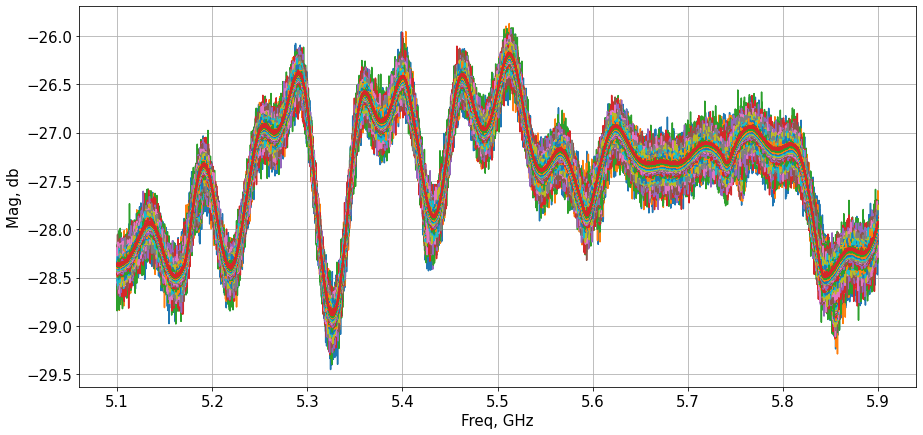

In [9]:
path = adress

font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Mag, db')

#T = np.array([5,20,30,40,50,60,70,80,90,100,120,140,160,180,200,225,250,275,300,350,400,450,500,600,700,800,900,1000])*1e-3
T = np.array([5,20,30,40,50,60,70,80,90,100,120,140,160,180,200,225,250,275,300,350,400])*1e-3
#P = np.linspace(-30,10,9)
P = np.concatenate((np.linspace(-30,-11,20),np.linspace(-10,12,12)))
#Band = np.array([1,1,10,10,100,100,1000,1000,1000])*100
Band = np.array([1,1,1,1,1,1,1,1,1,1,10,10,10,10,10,10,10,10,10,10,100,100,100,100,100,1000,1000,1000,1000,1000,1000,1000])*100

vna.set_band(1000)
#vna.set_nop(35001)
vna.set_nop(40001)
vna.set_power(-10)
#vna.set_freq_start_stop(3.35e9, 3.95e9, vna.get_nop())
vna.set_freq_start_stop(5.1e9, 5.9e9, vna.get_nop())
freqs = vna.get_freq()

state = dict()

mag = np.ones((len(freqs),len(T),len(P)))*(-100)
pha = np.ones((len(freqs),len(T),len(P)))*(0)

state['T'] = T
state['P'] = P
state['mag'] = mag
state['pha'] = pha
state['Band'] = Band
state['freqs'] = freqs

start_time = datetime.now()
file = r'S21_TPSweep'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file


for i in range(len(T)):
    lakeshore.set_setpoint(T[i], channel=6, sudo_mode=False)
    time.sleep(600)
    for j in range(len(P)):
        vna.set_power(P[j])
        vna.set_band(Band[j])
        time.sleep(1)
        mag[:,i,j], pha[:,i,j], freq = vna.get_data(True)
        ax.plot(freq/1e9, mag[:,i,j], label = '|S21|')
        state['mag'] = mag
        state['pha'] = pha
    savemat(file_name, state)
    duration_end = datetime.now()
    period = (duration_end-start_time).seconds    
    print('Duration: {}. End of script in: {}'.format(duration_end - start_time, 
                                        timedelta(seconds=period*len(T))))
lakeshore.set_setpoint(0.005, channel=6, sudo_mode=False)        
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))